# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['sys']['sunset']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | borba
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | margaret river
Processing Record 4 of Set 1 | el charco
Processing Record 5 of Set 1 | dudinka
Processing Record 6 of Set 1 | ilulissat
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | howrah
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | yangambi
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | ohara
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | balabac
Processing Record 18 of Set 1 | hachinohe
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | chibougamau
Processing Record 22 of Set 1 |

Processing Record 41 of Set 4 | chake chake
Processing Record 42 of Set 4 | santiago de cao
Processing Record 43 of Set 4 | sooke
Processing Record 44 of Set 4 | jamestown
Processing Record 45 of Set 4 | chinoz
Processing Record 46 of Set 4 | kailua-kona
Processing Record 47 of Set 4 | camarinas
Processing Record 48 of Set 4 | port mathurin
Processing Record 49 of Set 4 | tsiombe
Processing Record 0 of Set 5 | winnemucca
Processing Record 1 of Set 5 | al kharijah
Processing Record 2 of Set 5 | cochrane
Processing Record 3 of Set 5 | gordon
Processing Record 4 of Set 5 | saint-philippe
Processing Record 5 of Set 5 | hilo
Processing Record 6 of Set 5 | toliara
Processing Record 7 of Set 5 | faya-largeau
Processing Record 8 of Set 5 | orichi
Processing Record 9 of Set 5 | klaksvik
Processing Record 10 of Set 5 | punta arenas
Processing Record 11 of Set 5 | kavieng
Processing Record 12 of Set 5 | masterton
Processing Record 13 of Set 5 | norilsk
Processing Record 14 of Set 5 | keflavik
Pro

Processing Record 35 of Set 8 | hafar al-batin
Processing Record 36 of Set 8 | turbat
Processing Record 37 of Set 8 | zhoushan
Processing Record 38 of Set 8 | draguseni
Processing Record 39 of Set 8 | hayma'
City not found. Skipping...
Processing Record 40 of Set 8 | akrehamn
Processing Record 41 of Set 8 | raduzhny
Processing Record 42 of Set 8 | crescent city
Processing Record 43 of Set 8 | hulbuk
City not found. Skipping...
Processing Record 44 of Set 8 | nunspeet
Processing Record 45 of Set 8 | aguas formosas
Processing Record 46 of Set 8 | balakovo
Processing Record 47 of Set 8 | fale old settlement
Processing Record 48 of Set 8 | kuanda
Processing Record 49 of Set 8 | skvyra
Processing Record 0 of Set 9 | bodaybo
Processing Record 1 of Set 9 | plasencia
Processing Record 2 of Set 9 | dongola
Processing Record 3 of Set 9 | mantua
Processing Record 4 of Set 9 | polyarnyy
Processing Record 5 of Set 9 | dazhou
Processing Record 6 of Set 9 | fuyang
Processing Record 7 of Set 9 | chris

Processing Record 24 of Set 12 | colchani
Processing Record 25 of Set 12 | ouellah
City not found. Skipping...
Processing Record 26 of Set 12 | lake stevens
Processing Record 27 of Set 12 | yirga 'alem
City not found. Skipping...
Processing Record 28 of Set 12 | al ghayzah
Processing Record 29 of Set 12 | hakui
Processing Record 30 of Set 12 | wafangdian
Processing Record 31 of Set 12 | tazacorte
Processing Record 32 of Set 12 | puerto madero
Processing Record 33 of Set 12 | vizinga
Processing Record 34 of Set 12 | aykol
City not found. Skipping...
Processing Record 35 of Set 12 | basco
-----------------------------
Data Retrieval Complete      
-----------------------------


In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,borba,-4.3878,-59.5939,296.09,99,100,1.32,BR,1701986449
1,waitangi,-43.9535,-176.5597,286.38,68,87,8.01,NZ,1702106348
2,margaret river,-33.9500,115.0667,292.44,52,24,7.48,AU,1702034475
3,el charco,2.4769,-78.1105,297.20,95,74,1.23,CO,1701990207
4,dudinka,69.4058,86.1778,238.24,99,7,1.90,RU,0


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borba,-4.3878,-59.5939,296.09,99,100,1.32,BR,1701986449
1,waitangi,-43.9535,-176.5597,286.38,68,87,8.01,NZ,1702106348
2,margaret river,-33.9500,115.0667,292.44,52,24,7.48,AU,1702034475
3,el charco,2.4769,-78.1105,297.20,95,74,1.23,CO,1701990207
4,dudinka,69.4058,86.1778,238.24,99,7,1.90,RU,0


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

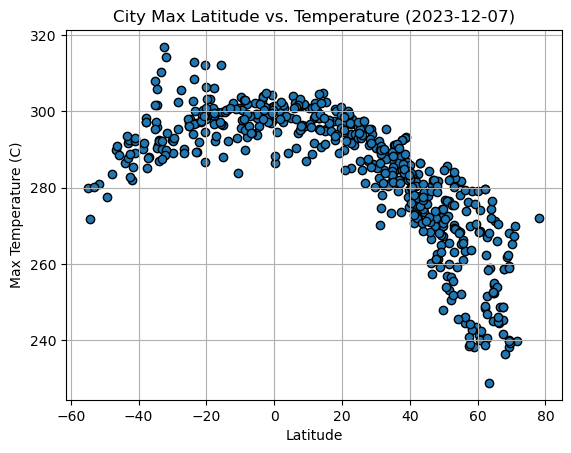

In [21]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
today = datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f'City Max Latitude vs. Temperature ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

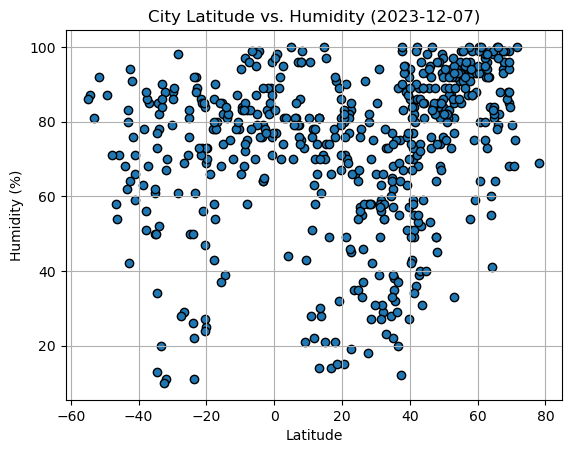

In [22]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')
today = datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

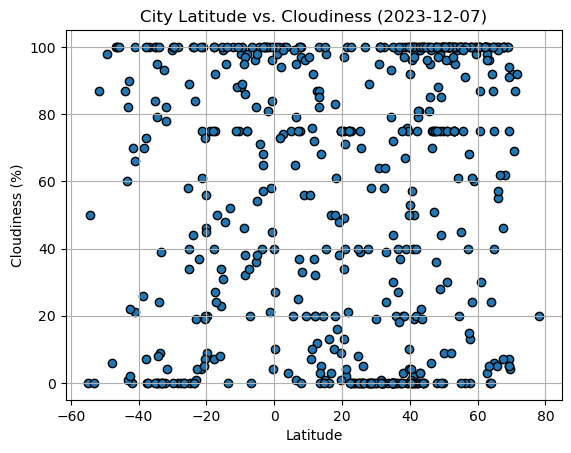

In [23]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')
today = datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

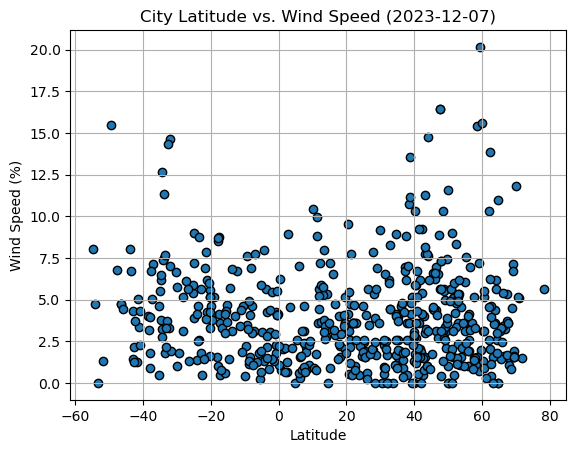

In [24]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')
today = datetime.today().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def lin_reg(df, xcol, ycol, xlabel, ylabel):
    x_values = df[xcol]
    y_values = df[ycol]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    x_annotate = df[xcol].min()
    y_annotate = df[ycol].min()
    if slope > 0:
        y_annotate = df[ycol].max()
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,el charco,2.4769,-78.1105,297.20,95,74,1.23,CO,1701990207
4,dudinka,69.4058,86.1778,238.24,99,7,1.90,RU,0
5,ilulissat,69.2167,-51.1000,268.16,68,75,1.54,GL,0
7,howrah,22.5892,88.3103,294.15,83,75,3.60,IN,1702034549
10,yangambi,0.8102,24.4336,294.50,98,98,0.80,CD,1702052181


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,borba,-4.3878,-59.5939,296.09,99,100,1.32,BR,1701986449
1,waitangi,-43.9535,-176.5597,286.38,68,87,8.01,NZ,1702106348
2,margaret river,-33.9500,115.0667,292.44,52,24,7.48,AU,1702034475
6,port-aux-francais,-49.3500,70.2167,277.45,87,98,15.48,TF,1702048420
8,kruisfontein,-34.0033,24.7314,286.97,78,0,7.40,ZA,1702056176


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8476915480644118


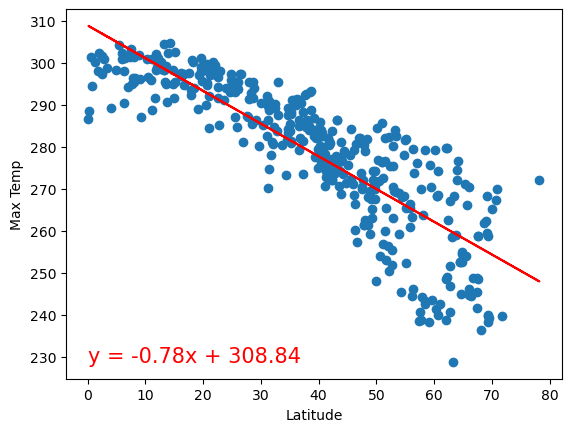

In [37]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df, 'Lat','Max Temp', 'Latitude', 'Max Temp')

The r-value is: 0.5236560898013868


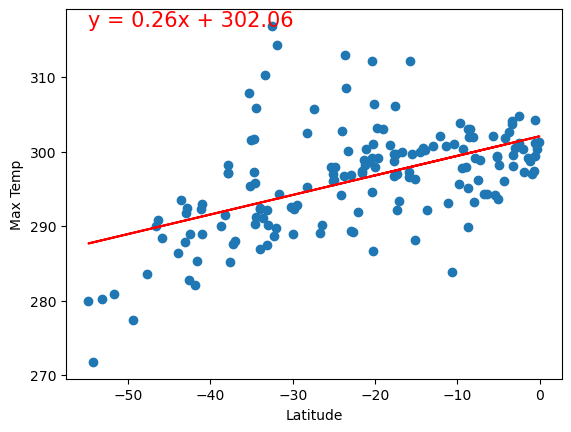

In [38]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df, 'Lat','Max Temp', 'Latitude', 'Max Temp')

**Discussion about the linear relationship:** An interesting ovservation is that on Northern Hemisphere, the temperature has a negative correlation(-ve r-value) with latitude. However on Southern Hemisphere, we have the opposite where the correlation(+ve r-value) betwwen temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3290881921980441


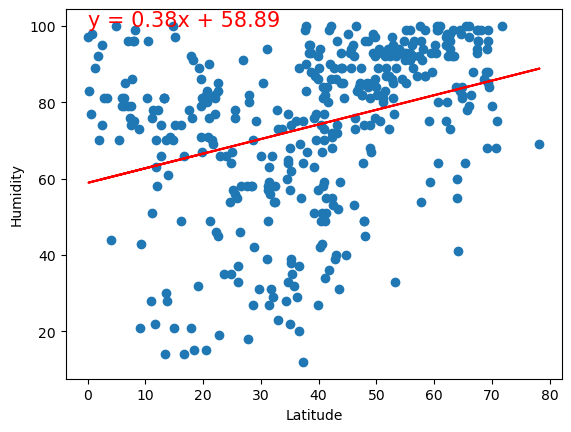

In [33]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Lat','Humidity', 'Latitude', 'Humidity')

The r-value is: 0.202454928948964


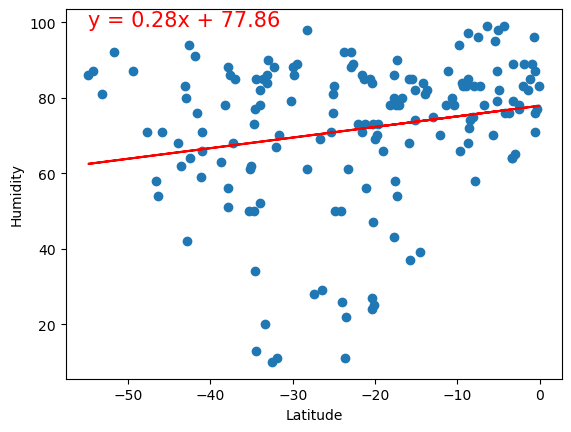

In [34]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Lat','Humidity', 'Latitude', 'Humidity')

**Discussion about the linear relationship:** In this case we have have a positive r-value. Therefore they both have positive correlation between humidity and latitude. However the correlation is weaker in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1543440556113349


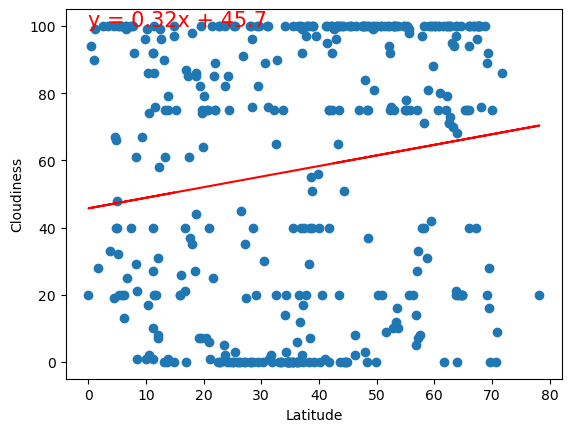

In [81]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Lat','Cloudiness', 'Latitude', 'Cloudiness')

The r-value is: 0.25672840000139985


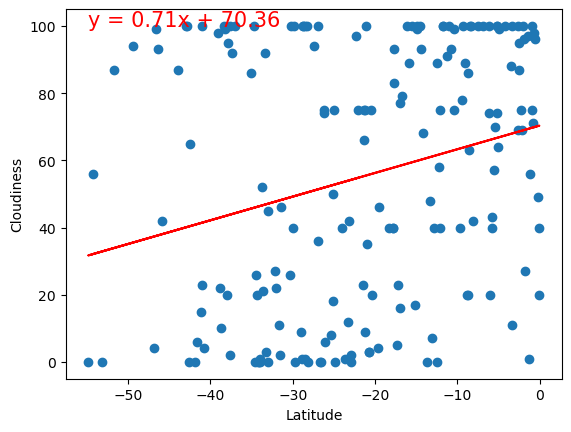

In [82]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Lat','Cloudiness', 'Latitude', 'Cloudiness')

**Discussion about the linear relationship:** In terms of cloudiness, latitude have positive correlation on both hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0636918436348764


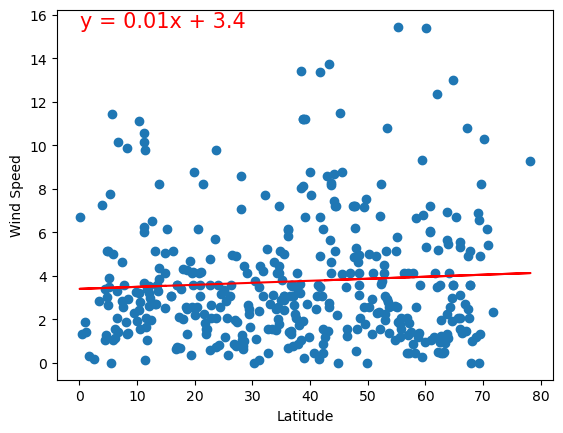

In [83]:
# Northern Hemisphere
lin_reg(northern_hemi_df, 'Lat','Wind Speed', 'Latitude', 'Wind Speed')

The r-value is: -0.28475294428809456


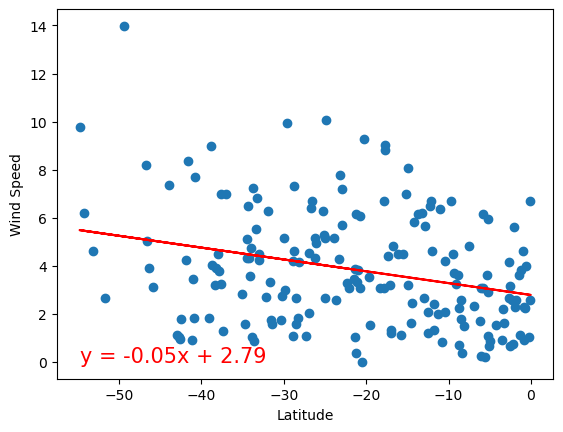

In [84]:
# Southern Hemisphere
lin_reg(southern_hemi_df, 'Lat','Wind Speed', 'Latitude', 'Wind Speed')

**Discussion about the linear relationship:** In the southerm hemisphere, we see a relative weak negative correction between latitude and wind speed. In the northerm hemisphere, there is a very weak positive correlation between latitude and wind speed with a value of 0.063 which is very close to zero.